<a href="https://colab.research.google.com/github/abhaymehtre/DA1_cluster-project/blob/main/DA1_Assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [65]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [66]:
# Path of the CSV File
import pandas as pd
import numpy as np
pd.set_option("display.max_rows",None)
pd.set_option("display.max_columns",None)
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import fbeta_score, f1_score,precision_score,recall_score,accuracy_score, roc_curve, auc
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')


path = '/content/earthquake.csv'

#Reading the CSV File

earthquake_df = pd.read_csv(path,engine='python',encoding='iso8859_15')
earthquake_df.head(10)


Sl. No.   YEAR  MONTH   DATE       (UTC) (IST)     Mw       Mw  \
0      NaN     NaN    NaN   NaN         NaN   NaN     NaN     NaN   
1      1.0 -2474.0      0   0.0         NaN   NaN  7.5000     7.5   
2      2.0  -325.0      0   0.0         NaN   NaN  7.5000     7.5   
3      3.0    25.0      0   0.0         NaN   NaN  7.5000     7.5   
4      4.0    26.0      5  10.0  08.19.10.0   NaN  6.1397  6.1397   
5      5.0    26.0      5  10.0  08.19.10.0   NaN  6.1397  6.1397   
6      6.0    50.0      0   0.0         NaN   NaN  7.0000       7   
7      7.0   110.0      0   0.0         NaN   NaN  6.5000     6.5   
8      8.0   250.0      0   0.0         NaN   NaN  8.5000     8.5   
9      9.0   260.0      0   0.0         NaN   NaN  8.0000       8   

            Mb         Mb.1           Ms           ML LAT (N) LONG (E)  \
0          NaN          NaN          NaN          NaN     NaN      NaN   
1          NaN  6.969202899  7.260619977  7.427072403      71       24   
2          NaN  6.969202899  7.260619977  7.427072403      71       24   
3          NaN  6.969202899  7.260619977  7.427072403    72.9    33.72   
4  5.737047101  5.737047101  5.698851894  5.999685205    17.3     80.1   
5  5.737047101  5.737047101  6.075520196  5.999685205      26       97   
6          NaN  6.516304348  6.686567164  6.902413431    69.5     37.1   
7          NaN  6.063405797  6.112514351   6.37775446   76.47     18.1   
8          NaN        7.875  8.408725603  8.476390346    74.5     34.6   
9          NaN  7.422101449   7.83467279  7.951731375    77.2     30.5   

   DEPTH (km) INTENSITY Unnamed: 16 Unnamed: 17 LOCATION REFERENCE  
0         NaN        MM         MMI         MME      NaN       NaN  
1         0.0       NaN         NaN         NaN      NaN   Dr STGR  
2         0.0       NaN         NaN         NaN      NaN   Dr STGR  
3         0.0       NaN         NaN         NaN      NaN   Dr STGR  
4         NaN       NaN         NaN         NaN      NaN      NEIC  
5        80.0       NaN         NaN         NaN  Myanmar       G-R  
6         0.0       NaN         NaN         NaN      NaN   Dr STGR  
7         0.0       NaN         NaN         NaN      NaN   Dr STGR  
8         0.0       NaN         NaN         NaN      NaN   Dr STGR  
9         0.0       NaN         NaN         NaN      NaN   Dr STGR

In [67]:
# Removed the columns which are not relevant for the model training.

df = pd.DataFrame(earthquake_df)



df.drop(['Sl. No.','Mb.1', 'Ms', 'ML', 'Mb','Mw', '(UTC)', '(IST)', 'Unnamed: 16', 'Unnamed: 17', 'LOCATION', 'REFERENCE', 'INTENSITY'], axis=1, inplace = True)

In [68]:
df.isnull().sum()

YEAR              1
MONTH            19
DATE             58
Mw            12055
LAT (N)           1
LONG (E)          1
DEPTH (km)     2179
dtype: int64

In [69]:
df.rename(columns = {'MONTH ':'month'}, inplace = True)
df['month']

0        NaN
1          0
2          0
3          0
4          5
5          5
6          0
7          0
8          0
9          0
10         6
11         0
12         0
13         0
14         0
15         0
16        12
17         0
18         2
19         0
20         0
21         2
22         9
23         0
24         0
25         6
26         7
27         7
28        10
29         1
30         2
31       NaN
32         5
33         5
34         5
35         6
36         6
37       NaN
38         0
39       NaN
40       NaN
41         6
42         2
43       NaN
44         2
45         7
46         7
47         0
48         3
49        10
50        10
51        12
52         1
53         5
54        12
55         1
56         2
57         1
58         2
59        10
60       NaN
61         4
62         7
63         6
64         8
65         6
66         8
67         0
68         1
69         8
70         0
71        11
72         6
73         5
74         5
75        10
76        10

In [70]:
df.fillna(0, inplace=True)

In [71]:
df.head()

YEAR  month  DATE     Mw  LAT (N) LONG (E)  DEPTH (km)
0     0.0     0   0.0  0.0000       0        0         0.0
1 -2474.0     0   0.0  7.5000      71       24         0.0
2  -325.0     0   0.0  7.5000      71       24         0.0
3    25.0     0   0.0  7.5000    72.9    33.72         0.0
4    26.0     5  10.0  6.1397    17.3     80.1         0.0

In [72]:
df=df.drop(labels=[0], axis=0) 

In [73]:
df.head()

YEAR  month  DATE     Mw  LAT (N) LONG (E)  DEPTH (km)
1 -2474.0     0   0.0  7.5000      71       24         0.0
2  -325.0     0   0.0  7.5000      71       24         0.0
3    25.0     0   0.0  7.5000    72.9    33.72         0.0
4    26.0     5  10.0  6.1397    17.3     80.1         0.0
5    26.0     5  10.0  6.1397      26       97        80.0

In [74]:
# To check the values of Latitude and Longitude .
# 
cols_to_check = ['LAT (N)','LONG (E)']

print (df[cols_to_check])

       LAT (N)  LONG (E)
1           71        24
2           71        24
3         72.9     33.72
4         17.3      80.1
5           26        97
6         69.5      37.1
7        76.47      18.1
8         74.5      34.6
9         77.2      30.5
10        65.4      36.4
11        91.8      26.1
12        62.2      34.3
13        67.8      24.8
14        68.9     26.93
15       69.13     32.85
16        19.1      73.2
17          85      27.5
18        62.2      34.4
19        77.2      30.5
20          68      24.1
21        61.7      34.9
22        90.2        30
23        77.2      30.5
24        64.2      35.8
25          69      34.5
26          69        34
27          78      27.2
28        98.5        25
29        71.8      34.8
30        94.9     26.75
31        18.9      72.9
32          25        68
33        19.1      73.2
34        21.2      72.9
35          77        35
36        72.3      33.9
37        19.7      73.1
38        73.2      19.1
39       28.66     77.25


In [75]:
df['LAT (N)'].replace({'°':''}, regex=True, inplace=True)
df['LAT (N)'].replace({' ':''}, regex=True, inplace=True)


In [76]:
df['LAT (N)'].replace({'N':''}, regex=True, inplace=True)



In [77]:
df['LAT (N)'].replace({'S':''}, regex=True, inplace=True)
df['LAT (N)'].replace({',':'.'}, regex=True, inplace=True)
# df['LAT (N)'].replace({'':''}, regex=True, inplace=True)

In [78]:
df['LONG (E)'].replace({'°':''}, regex=True, inplace=True)
df['LONG (E)'].replace({'E':''}, regex=True, inplace=True)
df['LONG (E)'].replace({'W':''}, regex=True, inplace=True)
df['LONG (E)'].replace({',':'.'}, regex=True, inplace=True)
df['LONG (E)'].replace({'S':''}, regex=True, inplace=True)
df['LONG (E)'].replace({' ':''}, regex=True, inplace=True)


In [79]:
# df['month'].replace({' ':''}, regex=True, inplace=True)


df.replace(" ",0, inplace=True)
df.replace('#VALUE!',0,inplace=True)

df.replace('..',0,inplace=True)


In [80]:
# Creating a empty list for Latitude and Longitude values

lat_list = []

long_list = []

# Doing iteration for each Latitude values to remove ? symbol given in the dataset.

for i in df['LAT (N)'].iteritems():
  temp = i[1]
  temp1 = temp.replace('?', '')
  lat_list.append(temp1)

for i in df['LONG (E)'].iteritems():
  temp = i[1]
  temp1 = temp.replace('?', '')
  long_list.append(temp1)  

# lat_list  
long_list
# Drop the 'LAT (N)', 'LONG (E)' column
df.drop('LAT (N)', axis = 1, inplace = True)

df.drop('LONG (E)', axis = 1, inplace = True)
df.insert(4, "LAT (N)", lat_list, True)
df.insert(5, "LONG (E)", long_list, True)

In [81]:
df.isnull().sum()

YEAR          0
month         0
DATE          0
Mw            0
LAT (N)       0
LONG (E)      0
DEPTH (km)    0
dtype: int64

In [82]:
df.head()

YEAR  month  DATE     Mw  LAT (N) LONG (E)  DEPTH (km)
1 -2474.0     0   0.0  7.5000      71       24         0.0
2  -325.0     0   0.0  7.5000      71       24         0.0
3    25.0     0   0.0  7.5000    72.9    33.72         0.0
4    26.0     5  10.0  6.1397    17.3     80.1         0.0
5    26.0     5  10.0  6.1397      26       97        80.0

In [83]:
df["month"] = df["month"].fillna(0)

In [84]:
# df[] = pd.to_numeric(df["A"], downcast="float")
df["month"] = pd.to_numeric(df["month"])
df["LAT (N)"] = pd.to_numeric(df["LAT (N)"])
df["LONG (E)"] = pd.to_numeric(df["LONG (E)"])


In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52989 entries, 1 to 52989
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   YEAR        52989 non-null  float64
 1   month       52989 non-null  int64  
 2   DATE        52989 non-null  float64
 3   Mw          52989 non-null  float64
 4   LAT (N)     52989 non-null  float64
 5   LONG (E)    52989 non-null  float64
 6   DEPTH (km)  52989 non-null  float64
dtypes: float64(6), int64(1)
memory usage: 3.2 MB


In [86]:
df.describe()

YEAR          month          DATE           Mw        LAT (N)  \
count  52989.000000  52989.000000  52989.000000  52989.000000  52989.000000   
mean    1991.584669      6.340278     16.376323      3.505354     57.750125   
std       41.964962      3.642311      8.980447      1.980136     31.051927   
min    -2474.000000      0.000000      0.000000      0.000000    -10.900000   
25%     1986.000000      3.000000      9.000000      3.500000     26.770000   
50%     1999.000000      6.000000     16.000000      4.300000     70.390000   
75%     2005.000000     10.000000     25.000000      4.700000     90.790000   
max     2019.000000     12.000000     31.000000      9.100000    100.000000   

           LONG (E)    DEPTH (km)  
count  52989.000000  52989.000000  
mean      52.425021     43.696815  
std       52.111590     55.111697  
min        0.800000      0.000000  
25%       27.500000      3.000000  
50%       37.400000     33.000000  
75%       91.230000     52.000000  
max     9128.200000    831.200000

In [87]:
threshold_value = 4.1
Magnitude_list = []
for i in df['Mw '].iteritems():
 temp = i[1]
 if temp < threshold_value:
  item = 0
  Magnitude_list.append(item)
 else:
  item = 1
  Magnitude_list.append(item)
print(Magnitude_list)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 

In [88]:
# Dropping the Magnitude column
df.drop('Mw ' , axis = 1, inplace = True)
  # Creating the new Magnitude column
df.insert(3, 'Mw', Magnitude_list, True)
df['Mw'] = pd.to_numeric(df['Mw'])

In [89]:
y=df['Mw'].values
X=df.drop('Mw' , axis = 1).values



In [90]:
# Splitting the data for training and testing
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

Hyper Parameters for Decision Trees

criterion: The function to measure the quality of a split. Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain.
Gini: The gini impurity measures the frequency at which any element of the dataset will be mislabelled when it is randomly labeled.
Entropy is a measure of information that indicates the disorder of the features with the target.
splitter: The strategy used to choose the split at each node. Supported strategies are “best” to choose the best split and “random” to choose the best random split.
max_depth: The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples
min_samples_split: The minimum number of samples required to split an internal node

In [202]:
# Decision Tree Classification before pre-puning
# Declare a Decision Tree classifier
dt_clf = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=None, min_samples_split=2)
# Create Decision Tree on the training data
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [203]:
# predicting 
dt_p=dt_clf.predict(X_test)

# printing confusion matrix
print(confusion_matrix(y_test,dt_p))
# printing classification report
print(classification_report(y_test,dt_p))
print(accuracy_score(y_test,dt_p))

[[2649 1109]
 [1152 5688]]
              precision    recall  f1-score   support

           0       0.70      0.70      0.70      3758
           1       0.84      0.83      0.83      6840

    accuracy                           0.79     10598
   macro avg       0.77      0.77      0.77     10598
weighted avg       0.79      0.79      0.79     10598

0.78665785997358


In [204]:
# Calculate and draw the ROC Curve for Decision Trees before Pre-pruning
fpr , tpr, thresholds = roc_curve(y_test, dt_p)
tpr

array([0.        , 0.83157895, 1.        ])



ROC Curve for decision tree before calculating Pre-Prune depth.




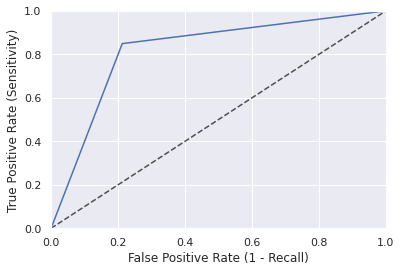



Area Under Curve: 0.82




In [211]:
# Plot a curve for decision tree before pre-prune depth

fig, ax = plt.subplots()
ax.plot(fpr, tpr)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="--", c=".3")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
print("\n")
print ("ROC Curve for decision tree before calculating Pre-Prune depth.")
print("\n")
plt.xlabel('False Positive Rate (1 - Recall)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)
plt.show()

print("\n")
print ("Area Under Curve: %.2f" %auc(fpr, tpr))


print("\n")

In [207]:
# Decision Tree classifier with Pre-Pruning at Max_depth=17
dt_clf1 = DecisionTreeClassifier(criterion= 'gini',max_depth= 17,min_samples_leaf= 3,min_samples_split= 12,splitter= 'random')
dt_clf1.fit(X_train, y_train)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=17, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=12,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='random')

In [208]:
# predicting pre-prune data 
dt_p1=dt_clf1.predict(X_test)

# printing confusion matrix
print(confusion_matrix(y_test,dt_p1))
# printing classification report
print(classification_report(y_test,dt_p1))
print(accuracy_score(y_test,dt_p1))

[[2959  799]
 [1030 5810]]
              precision    recall  f1-score   support

           0       0.74      0.79      0.76      3758
           1       0.88      0.85      0.86      6840

    accuracy                           0.83     10598
   macro avg       0.81      0.82      0.81     10598
weighted avg       0.83      0.83      0.83     10598

0.8274202679750896


In [209]:
# Calculate and draw the ROC Curve for Decision Trees
fpr , tpr, thresholds = roc_curve(y_test, dt_p1)
tpr

array([0.       , 0.8494152, 1.       ])



ROC Curve for decision tree after calculating Pre-Prune depth.




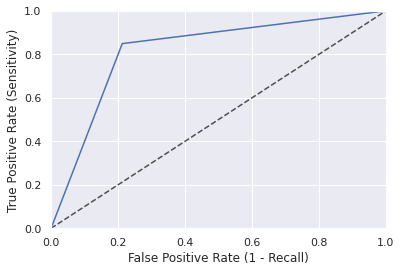



Area Under Curve: 0.82




In [212]:
fig, ax = plt.subplots()
ax.plot(fpr, tpr)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="--", c=".3")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
print("\n")
print ("ROC Curve for decision tree after calculating Pre-Prune depth.")
print("\n")
plt.xlabel('False Positive Rate (1 - Recall)')
plt.ylabel('True Positive Rate (Sensitivity)')


plt.grid(True)
plt.show()
print("\n")
print ("Area Under Curve: %.2f" %auc(fpr, tpr))

print("\n")

Pre-Pruning Operation for Decision Tree :

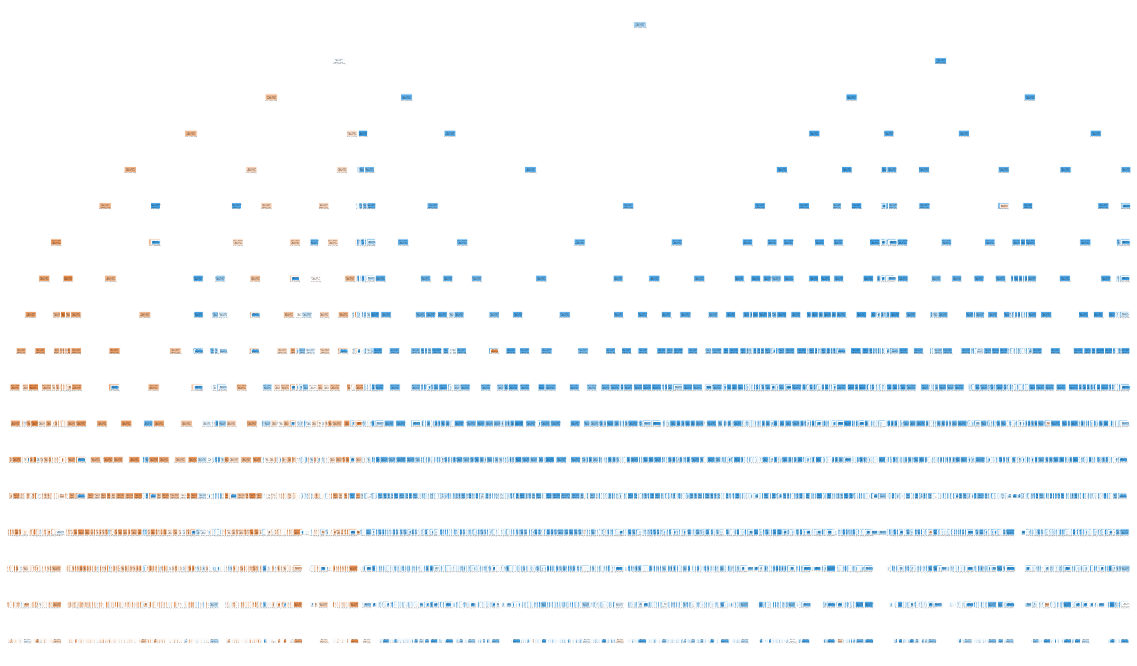

In [213]:
from sklearn import tree
plt.figure(figsize=(20,12))
tree.plot_tree(dt_clf1,rounded=True,filled=True)
plt.show()


In [180]:
# Checking the accuracy score of test dataset after pruning
y_predicted=dt_clf1.predict(X_test)
accuracy_score(y_test,y_predicted)

0.8200603887525948

In [101]:
# Fit KNN classifier and find the right number of neighbours that gives best performance.
# Show results for using both Euclidean distance and Manhattan Distance metric for the KNN classifier.

from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

# We store the classifier in clf variabale and gives the metrics and the best neighbours which fits our models
clf = KNeighborsClassifier(n_neighbors=12, metric="manhattan")
clf.fit(X_train, y_train)
Pred_y = clf.predict(X_test)
print(clf)
print("Score: %0.2f" % clf.score(X_train, y_train))
print("Accuracy of model at k=3 is ", metrics.accuracy_score(y_test, Pred_y))

print()
clf = KNeighborsClassifier(n_neighbors=12, metric="euclidean")
clf.fit(X_train, y_train)
knn_p = clf.predict(X_test)
print(clf)
print("Score: %0.2f" % clf.score(X_train, y_train))
print("Accuracy of model at k=3 is ", metrics.accuracy_score(y_test, Pred_y))

#We test the accuracy score
n_neighbors=np.arange(3,12)
optimumk=[]
for neighbor in n_neighbors:
    knn_clf = KNeighborsClassifier(n_neighbors=neighbor, metric="manhattan")
    knn_clf.fit(X_train, y_train)
    knn_p=knn_clf.predict(X_test)
    acc=accuracy_score(y_test,knn_p)
    optimumk.append(acc)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
                     metric_params=None, n_jobs=None, n_neighbors=12, p=2,
                     weights='uniform')
Score: 0.86
Accuracy of model at k=3 is  0.840064163049632

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=12, p=2,
                     weights='uniform')
Score: 0.86
Accuracy of model at k=3 is  0.8388375165125496


max accuracy is 0.8421400264200792 when neighbors are 11


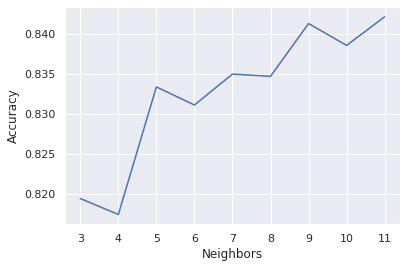

In [102]:
import matplotlib.pyplot as plt
#Plotting Graph
plt.plot(n_neighbors,optimumk)
plt.xlabel('Neighbors')
plt.ylabel('Accuracy')
print(f'max accuracy is {max(optimumk)} when neighbors are {n_neighbors[optimumk.index(max(optimumk))]}')

In [140]:
# Calculate and draw the ROC curve for KNN classifier

fpr , tpr, thresholds = roc_curve(y_test, knn_p)
tpr

array([0.        , 0.87865497, 1.        ])

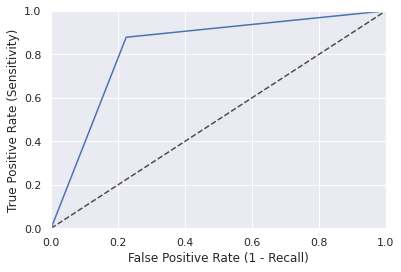



Area Under Curve: 0.83




In [141]:
fig, ax = plt.subplots()
ax.plot(fpr, tpr)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="--", c=".3")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.xlabel('False Positive Rate (1 - Recall)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)
plt.show()
print("\n")
print ("Area Under Curve: %.2f" %auc(fpr, tpr))
print("\n")

In [103]:
from sklearn.ensemble import AdaBoostClassifier


ada_clf = AdaBoostClassifier(n_estimators=100)
ada_clf.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=100, random_state=None)

In [104]:
# predicting  
ada_p=ada_clf.predict(X_test)

# printing confusion matrix
print(confusion_matrix(y_test,ada_p))
# printing classification report
print(classification_report(y_test,ada_p))
print(accuracy_score(y_test,ada_p))

[[2896  862]
 [ 844 5996]]
              precision    recall  f1-score   support

           0       0.77      0.77      0.77      3758
           1       0.87      0.88      0.88      6840

    accuracy                           0.84     10598
   macro avg       0.82      0.82      0.82     10598
weighted avg       0.84      0.84      0.84     10598

0.8390262313644083


In [142]:

fpr , tpr, thresholds = roc_curve(y_test, ada_p)
tpr


array([0.        , 0.87660819, 1.        ])

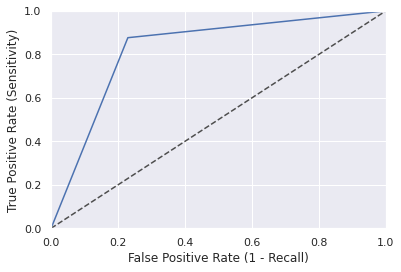



Area Under Curve: 0.82




In [143]:
fig, ax = plt.subplots()
ax.plot(fpr, tpr)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="--", c=".3")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.xlabel('False Positive Rate (1 - Recall)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)
plt.show()
print("\n")
print ("Area Under Curve: %.2f" %auc(fpr, tpr))
print("\n")

Bagging and Pasting in Scikit-Learn

In [158]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag_clf = BaggingClassifier(
    DecisionTreeClassifier(), n_estimators=500,
    max_samples=100, bootstrap=False)
bag_clf.fit(X_train, y_train)
bag_p = bag_clf.predict(X_test)

In [159]:
# ROC Curve for Bagging and Pasting
fpr , tpr, thresholds = roc_curve(y_test, bag_p)
tpr


array([0.        , 0.85321637, 1.        ])

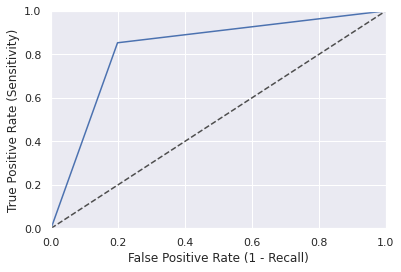



Area Under Curve: 0.83




In [160]:
fig, ax = plt.subplots()
ax.plot(fpr, tpr)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="--", c=".3")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.xlabel('False Positive Rate (1 - Recall)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)
plt.show()
print("\n")
print ("Area Under Curve: %.2f" %auc(fpr, tpr))
print("\n")

In [147]:
from sklearn.ensemble import RandomForestClassifier

rfc_clf = RandomForestClassifier(max_depth=2, random_state=0)
rfc_clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=2, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [148]:
# predicting 
rfc_p=ada_clf.predict(X_test)

# printing confusion matrix
print(confusion_matrix(y_test,rfc_p))
# printing classification report
print(classification_report(y_test,rfc_p))
print(accuracy_score(y_test,rfc_p))

[[2896  862]
 [ 844 5996]]
              precision    recall  f1-score   support

           0       0.77      0.77      0.77      3758
           1       0.87      0.88      0.88      6840

    accuracy                           0.84     10598
   macro avg       0.82      0.82      0.82     10598
weighted avg       0.84      0.84      0.84     10598

0.8390262313644083


In [150]:
# ROC CURVE FOR RANDOM FOREST
fpr , tpr, thresholds = roc_curve(y_test, rfc_p)
tpr



array([0.        , 0.87660819, 1.        ])

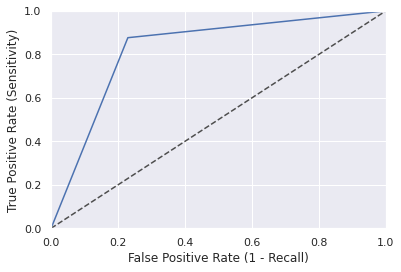



Area Under Curve: 0.82




In [151]:
fig, ax = plt.subplots()
ax.plot(fpr, tpr)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="--", c=".3")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.xlabel('False Positive Rate (1 - Recall)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)
plt.show()
print("\n")
print ("Area Under Curve: %.2f" %auc(fpr, tpr))
print("\n")

Evaluate the Model

In [109]:
#Predicting for test data
y_pred = clf.predict(X_test)
y_pred

array([0, 0, 1, ..., 1, 1, 1])

In [110]:
#Calculating results for various evaluation metric
precision = precision_score(y_test,y_pred, average='micro')
recall = recall_score(y_test,y_pred, average='micro')
accuracy = accuracy_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred, average='macro')

In [111]:
print(f"Accuracy: {accuracy}")
print(f"Recall: {recall}")
print(f"Precision: {precision}")
print(f"F1-score: {f1}")

Accuracy: 0.8124174372523117
Recall: 0.8124174372523117
Precision: 0.8124174372523117
F1-score: 0.8009476967918989


In [112]:
cm = confusion_matrix(y_test , y_pred)
cm

array([[3033,  725],
       [1263, 5577]])

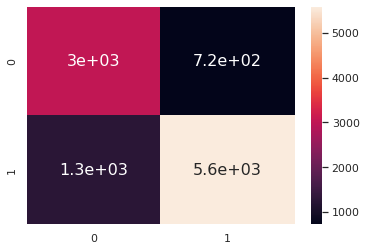

In [113]:
import seaborn as sns

#Convert the values into dataframe for dispalying
df_cm = pd.DataFrame(cm, range(cm.shape[0]), range(cm.shape[1]))
sns.set(font_scale=1) # for label size
#Display the confusion matrix in the form of heatmap
sns.heatmap(df_cm, annot=True, annot_kws={"size": 16}) # font size
#Show the plot
plt.show()

K-Fold Validation

In [117]:
import numpy as np
from sklearn.model_selection import KFold
from statistics import *
# from sklearn.model_selection import cross_val_score
acc=[]
kf = KFold(n_splits=5)
for train_index, test_index in kf.split(X):
    trainx,trainy=X[train_index],y[train_index]
    testx,testy=X[test_index],y[test_index]
    model.fit(trainx,trainy)
    pred=model.predict(testx)
    acc.append(accuracy_score(testy,pred))
# scores = cross_val_score(model, X, y, scoring='accuracy', cv=kf, n_jobs=-1)
# # report performance
# print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))
print(acc)
print(np.mean(acc))

[0.7830722777882619, 0.801943762974146, 0.8333647858086431, 0.898377052274014, 0.7428517504954232]
0.8119219258680976


In [118]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import log_loss

In [119]:
# Predicting 
y_pred = clf.predict(X_test)
results = confusion_matrix(y_test, y_pred)
#print ('Confusion Matrix :')
print(results)
print ('Accuracy Score is',accuracy_score(y_test, y_pred))
print ('Classification Report : ')
print (classification_report(y_test, y_pred))
print('AUC-ROC:',roc_auc_score(y_test, y_pred))
print('LOGLOSS Value is',log_loss(y_test, y_pred))

[[3033  725]
 [1263 5577]]
Accuracy Score is 0.8124174372523117
Classification Report : 
              precision    recall  f1-score   support

           0       0.71      0.81      0.75      3758
           1       0.88      0.82      0.85      6840

    accuracy                           0.81     10598
   macro avg       0.80      0.81      0.80     10598
weighted avg       0.82      0.81      0.81     10598

AUC-ROC: 0.8112145551478483
LOGLOSS Value is 6.478926890094294


In [215]:
#selecting the best algorithm from all the algorithms based on accuracy
classifier=[dt_clf,dt_clf1,knn_clf,ada_clf,rfc_clf,bag_clf]
predictions=[dt_p,y_predicted,knn_p,ada_p,rfc_p,bag_p]


for clf,pred in zip(classifier,predictions):
    print(f'accuracy with {clf.__class__.__name__} : {accuracy_score(y_test,pred)}')

accuracy with DecisionTreeClassifier : 0.78665785997358
accuracy with DecisionTreeClassifier : 0.8200603887525948
accuracy with KNeighborsClassifier : 0.8421400264200792
accuracy with AdaBoostClassifier : 0.8390262313644083
accuracy with RandomForestClassifier : 0.8390262313644083
accuracy with BaggingClassifier : 0.8348745046235139
